In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import random

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNetCV, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
path = "./faststore/"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, delimiter=";")
    if (len(df[df['\tCPU cores']])/df.shape[0] < 0.7):
        li.append(df)

new_df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
new_df

,Timestamp [ms],\tCPU cores,\tCPU capacity provisioned [MHZ],\tCPU usage [MHZ],\tCPU usage [%],\tMemory capacity provisioned [KB],\tMemory usage [KB],\tDisk read throughput [KB/s],\tDisk write throughput [KB/s],\tNetwork received throughput [KB/s],\tNetwork transmitted throughput [KB/s]
0,1376314846,4,11703.998240,10912.027692,93.233333,67108864.0,6.129274e+06,0.133333,15981.600000,0.000000,2.133333
1,1376315146,4,11703.998240,10890.570362,93.050000,67108864.0,6.755624e+06,1.333333,19137.333333,0.000000,2.600000
2,1376315446,4,11703.998240,10434.114431,89.150000,67108864.0,8.947846e+06,2.533333,19974.933333,535.666667,23.933333
3,1376315746,4,11703.998240,10539.450415,90.050000,67108864.0,1.879048e+07,5.466667,8791.800000,349.666667,5.466667
4,1376316046,4,11703.998240,10951.041020,93.566667,67108864.0,9.305761e+06,5.400000,15679.533333,0.000000,2.066667
...,...,...,...,...,...,...,...,...,...,...,...
11221795,1378905598,4,9599.998716,0.000000,0.000000,522288.0,2.306640e+04,0.000000,0.000000,0.000000,0.000000
11221796,1378905898,4,9599.998716,0.000000,0.000000,522288.0,2.131893e+04,0.000000,0.000000,0.000000,0.000000
11221797,1378906198,4,9599.998716,0.000000,0.000000,522288.0,1.502880e+04,0.000000,0.000000,0.000000,0.000000
11221798,1378906498,4,9599.998716,0.000000,0.000000,522288.0,1.747360e+04,0.000000,0.000000,0.000000,0.000000


In [4]:
new_df.columns = new_df.columns.str.replace("\t", "")

<AxesSubplot:>

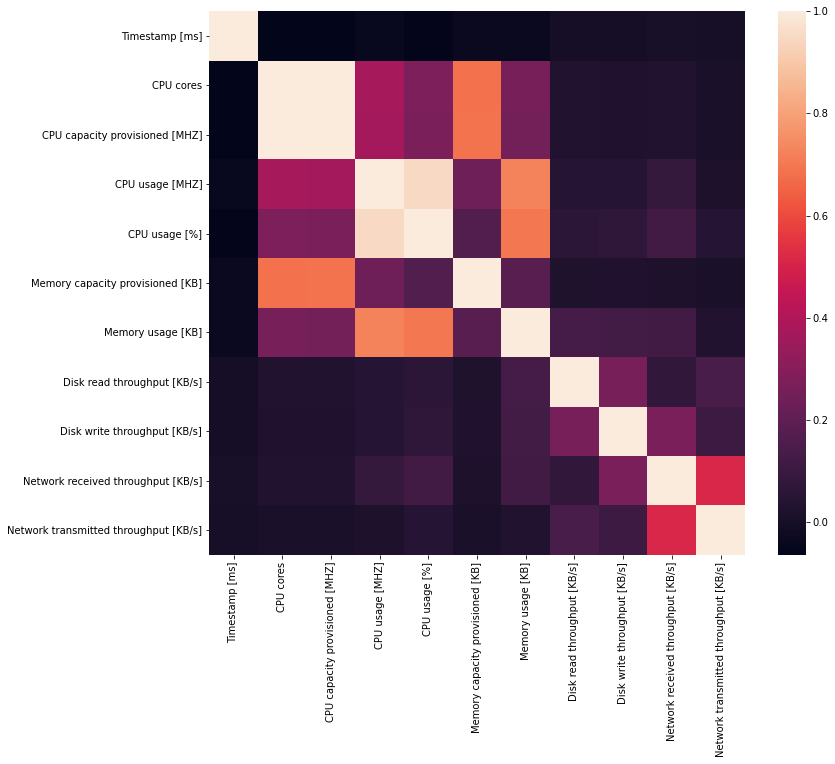

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(new_df.corr())

In [6]:
new_df.columns

Index(['Timestamp [ms]', 'CPU cores', 'CPU capacity provisioned [MHZ]',
       'CPU usage [MHZ]', 'CPU usage [%]', 'Memory capacity provisioned [KB]',
       'Memory usage [KB]', 'Disk read throughput [KB/s]',
       'Disk write throughput [KB/s]', 'Network received throughput [KB/s]',
       'Network transmitted throughput [KB/s]'],
      dtype='object')

In [7]:
col = ["Timestamp [ms]", 'CPU cores', 'CPU capacity provisioned [MHZ]', 'CPU usage [MHZ]', 'Memory usage [KB]']

In [8]:
df = new_df[col]

In [9]:
#new_df["Timestamp [ms]"] = new_df["Timestamp [ms]"] * 0.001
df = df.sort_values("Timestamp [ms]")
df = df.groupby("Timestamp [ms]").mean()


In [10]:
df

,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],Memory usage [KB]
Timestamp [ms],,,,
1376314846,3.123382,8356.553462,1259.701781,773476.700834
1376315146,3.123382,8356.553465,1311.073134,713465.677165
1376315446,3.123382,8356.553465,1213.854216,706308.206336
1376315746,3.123382,8356.553464,935.206829,711822.267357
1376316046,3.123382,8356.553464,910.185790,732891.662698
...,...,...,...,...
1378906760,0.000000,0.000000,7.406060,0.000000
1378906782,0.000000,0.000000,0.000000,0.000000
1378906788,0.000000,0.000000,0.000000,0.000000


In [11]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [12]:
df_scaled = df_scaled.set_index(df.index)

In [13]:
for col in df_scaled.columns:
    for i in range(1,1001):
        df_scaled[col + f" {i}shifted"] = df_scaled[col].shift(i)

/tmp/ipykernel_1442/2149725650.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_scaled[col + f" {i}shifted"] = df_scaled[col].shift(i)
/tmp/ipykernel_1442/2149725650.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_scaled[col + f" {i}shifted"] = df_scaled[col].shift(i)
/tmp/ipykernel_1442/2149725650.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

In [14]:
df_scaled = df_scaled.dropna()

: 

: 

In [ ]:
train = df_scaled.head(int(df_scaled.shape[0] * 0.9))
test = df_scaled.tail(int(df_scaled.shape[0] * 0.1))

y_train = y.head(int(df_scaled.shape[0] * 0.9))
y_test = y.tail(int(df_scaled.shape[0] * 0.1))

In [ ]:
train.shape, test.shape, y_train.shape, y_test.shape

((56817, 3), (6313, 3), (56817,), (6313,))

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 1000 # 300ms * 1000 timesteps = 5 mins

In [ ]:
X_train, y_train = create_dataset(train, y_train, time_steps)
X_test, y_test = create_dataset(test, y_test, time_steps)

In [ ]:
X_train.shape

(55817, 1000, 3)

In [ ]:
def get_model_score(pipeline, X_train, X_test, y_train, y_test):
    
    pipeline.fit(X_train, y_train)
    
    r2_score_train = r2_score(y_train, pipeline.predict(X_train))
    r2_score_test = r2_score(y_test, pipeline.predict(X_test))
    
    mse_train = mean_absolute_error(y_train, pipeline.predict(X_train))
    mse_test = mean_absolute_error(y_test, pipeline.predict(X_test))
    
    
    print("R2 score_train: ", r2_score_train)
    print("R2 score_test: ", r2_score_test)
    print("Train Mean Squeare Error: ", mse_train)
    print("Test Mean Squeare Error: ", mse_test)

In [ ]:
get_model_score(LinearRegression(), X_train, X_test, y_train, y_test)

ValueError: Found array with dim 3. Estimator expected <= 2.